In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/baseball/KBO_2019_player_gamestats.csv', encoding='cp949')

In [4]:
df.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,0,2,1,0,0,3,3,0,0,0,0,0,0,1,0,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,2,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,1,3,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166


In [5]:
columns_select = ['팀', '이름', '생일','일자', '상대','타수','안타','홈런', '루타', '타점','볼넷', '사구', '희비']
data = df[columns_select]
data.head()

,팀,이름,생일,일자,상대,타수,안타,홈런,루타,타점,볼넷,사구,희비
0,두산,페르난데스,1988-04-27,03-23,한화,4,2,0,3,3,0,0,0
1,두산,페르난데스,1988-04-27,03-24,한화,2,0,0,0,0,0,0,0
2,두산,페르난데스,1988-04-27,03-26,키움,2,0,0,0,1,2,0,0
3,두산,페르난데스,1988-04-27,03-27,키움,4,3,0,3,1,0,0,0
4,두산,페르난데스,1988-04-27,03-28,키움,3,0,0,0,0,2,0,0


# KBO 최고의 타자는?

In [6]:
data_player = data.pivot_table(index = ['팀','이름','생일'], values = ['타수','안타','홈런','루타','타점','볼넷','사구','희비'], aggfunc='sum')
data_player.head()


루타  볼넷  사구   안타   타수  타점  홈런  희비
팀   이름  생일                                           
KIA 고영창 1989-02-24    0   0   0    0    0   0   0   0
    김선빈 1989-12-18  146  43   1  115  394  40   3   4
    김세현 1987-08-07    0   0   0    0    0   0   0   0
    김주찬 1981-03-25  126  17   5  101  337  32   3   3
    나지완 1985-05-19   47  19   3   24  129  17   6   2

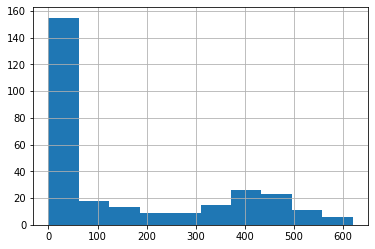

In [7]:
# 타수가 0인 데이터 제거

data_player['타수'].hist()

In [8]:
# 타수가 50 이하인 데이터는 데이터 값이 높더라도 의미있는 값이라 보기 어려움
cond = data_player['타수'] > 50
data_player = data_player[cond].reset_index()


In [9]:
data_player.head()

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2


In [10]:
def cal_hit(df):
    '''
    - 타율 : 타격에 성공해서 진루하는 비율 --> 안타 / 타수
    - 출루율: 살아서 진루하는 비율 -->  (안타+볼넷+몸에맞는볼)/(타수+볼넷+몸에맞는볼+희생플라이)
    - 장타율 : 타율에 진루한 베이스 가중치 추가 -->   루타 / 타수
    '''
    df['타율'] = df['안타'] / df['타수']
    df['출루율'] = (df['안타'] + df['볼넷'] + df['사구']) / (df['타수'] + df['볼넷'] + df['사구'] + df['희비'])
    df['장타율'] = df['루타'] / df['타수']
    df['OPS'] = df['출루율'] + df['장타율']

    return df




In [11]:
# data_player에 있는 선수별 실적을 이용해 타율, 출루율, 장타율, OPS 를 계산.
data_player = cal_hit(data_player) 
data_player

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4,0.291878,0.359729,0.370558,0.730287
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3,0.299703,0.339779,0.373887,0.713666
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2,0.186047,0.300654,0.364341,0.664995
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0,0.253333,0.312883,0.320000,0.632883
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2,0.259921,0.300373,0.317460,0.617833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,한화,정은원,2000-01-17,211,48,0,148,564,57,8,6,0.262411,0.317152,0.374113,0.691266
133,한화,지성준,1994-04-10,38,5,0,26,104,11,2,0,0.250000,0.284404,0.365385,0.649788
134,한화,최재훈,1989-08-27,135,56,14,108,373,31,3,4,0.289544,0.398210,0.361930,0.760141
135,한화,최진행,1985-08-17,51,9,2,27,117,19,6,1,0.230769,0.294574,0.435897,0.730471


In [12]:
# 출루율/장타율/OPS/타율 기준으로 KBO 최고 타자는 누구인지 성적순으로 정렬 
# 출루율을 기준으로 정렬을 하며, 만약 동률일 경우 그다음 기준인 장타율을, 이후에는 OPS, 타율을 기준으로 정렬

data_player = data_player.sort_values(by=['출루율','장타율','OPS', '타율'],ascending=False)
player_stat = data_player.reset_index(drop=True)


In [13]:
player_stat

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,NC,나성범,1989-10-03,60,12,1,34,93,14,4,0,0.365591,0.443396,0.645161,1.088558
1,NC,양의지,1987-06-05,225,48,15,139,394,68,20,6,0.352792,0.436285,0.571066,1.007351
2,KT,강백호,1999-07-29,217,61,2,147,438,65,13,4,0.335616,0.415842,0.495434,0.911275
3,KIA,최형우,1983-12-16,221,85,7,137,456,86,17,7,0.300439,0.412613,0.484649,0.897262
4,두산,페르난데스,1988-04-27,277,63,6,197,581,90,15,6,0.339071,0.405488,0.476764,0.882252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,롯데,강로한,1992-05-13,108,13,3,69,288,25,4,1,0.239583,0.278689,0.375000,0.653689
133,삼성,송준석,1994-05-04,18,2,1,12,51,4,1,1,0.235294,0.272727,0.352941,0.625668
134,롯데,김문호,1987-06-22,32,4,0,25,103,4,0,1,0.242718,0.268519,0.310680,0.579198
135,삼성,김도환,2000-04-14,31,8,0,19,93,7,2,1,0.204301,0.264706,0.333333,0.598039


In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


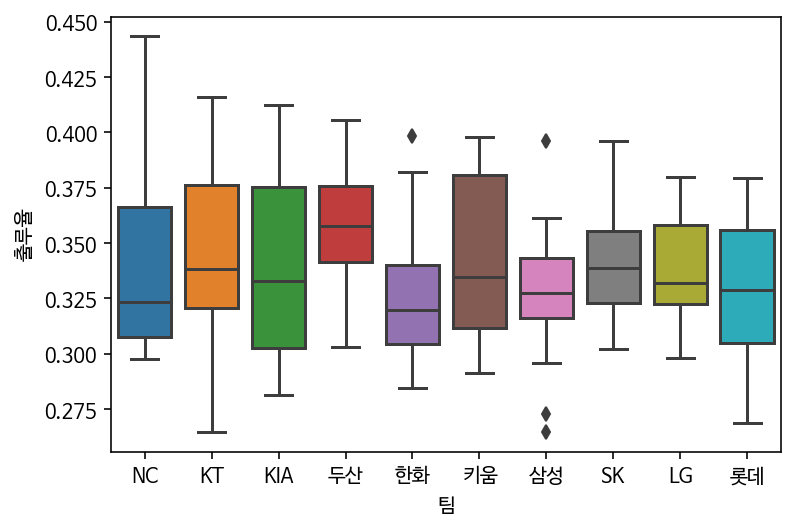

In [15]:
# 팀별 선수 출루율 분포를 boxplot을 이용해 살펴보겠습니다.
sns.boxplot(data=player_stat,x='팀', y='출루율')


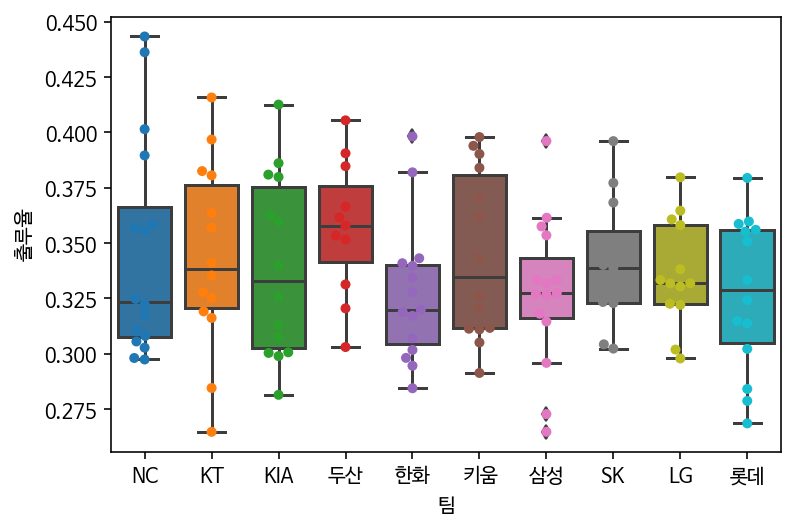

In [16]:
# 팀별 선수 출루율 분포를 swarmplot과 boxplot을 이용
sns.swarmplot(data = player_stat, x='팀', y='출루율') # 개수를 알수 없는 데이터들을 개수를 알 수 있도록 보여준다.
sns.boxplot(data=player_stat,x='팀', y='출루율')


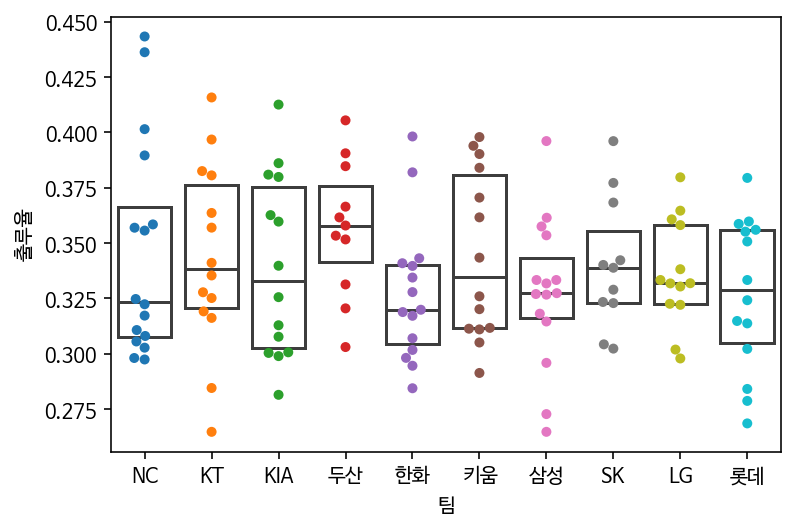

In [17]:


sns.swarmplot(data = player_stat, x = '팀', y = '출루율')
sns.boxplot(data = player_stat, x = '팀', y = '출루율',
            showcaps=False,             # 박스 상단 가로라인 보이지 않기
            whiskerprops={'linewidth':0}, # 박스 상단 세로 라인 보이지 않기 
            showfliers=False,           # 박스 범위 벗어난 아웃라이어 표시하지 않기
            boxprops={'facecolor':'None'}, # 박스 색상 지우기
           )